In [1]:
import chess
from LichAnalyse import LichAnalyse
import pandas as pd
from datetime import datetime

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
with open('./lichess.token') as f:
    token = f.read()

In [3]:
lich = LichAnalyse(token)

In [4]:
games = lich.get_games()

In [53]:
games[2177]

{'id': 'GGlqRaYO',
 'rated': False,
 'variant': 'standard',
 'speed': 'rapid',
 'perf': 'rapid',
 'createdAt': 1584896035662,
 'lastMoveAt': 1584897076693,
 'status': 'mate',
 'players': {'white': {'user': {'name': 'Bummmmmmmm', 'id': 'bummmmmmmm'},
   'rating': 1685},
  'black': {}},
 'winner': 'black',
 'moves': 'd4 c6 c4 d5 e3 Nf6 Nc3 Qc7 Nf3 e6 cxd5 Bb4 dxe6 Bxe6 Be2 Nbd7 O-O h5 a3 Bd6 h3 g5 Nxg5 Bh2+ Kh1 Ng4 Nxe6 Qd6 Bxg4 hxg4 Qxg4 fxe6 Qg6+ Kd8 g3 Rxh3 Qg8+ Nf8 Qg5+ Kc7 Qe5 Bxg3+ Kg2 Bxe5 dxe5 Qxe5 Kxh3 Ng6 Rg1 Rh8+ Kg2 Qh2+ Kf1 Ne5 Rg7+ Kd6 Ne4+ Kd5 Nc3+ Kc5 Ne4+ Kb6 Ke2 Rf8 Bd2 Qh5+ Ke1 Qf3 Nc3 Nd3+ Kf1 Qxf2#',
 'clock': {'initial': 600, 'increment': 0, 'totalTime': 600}}

In [6]:
for i, game in enumerate(games):
    if i > 10:
        break    
    if game['players']['white']['user']['name'] == lich.account_name:
        #print(f"{game['players']['black']['user']['name']} - {game['players']['black']['rating']}")
        print(game['players']['black']['user']['name'])
    else:
        #print(f"{game['players']['white']['user']['name']} - {game['players']['white']['rating']}")
        print(game['players']['white']['user']['name'])


Scacchi1
Raviudma
Balderas03
quzath_banu7
AnnetteTay
Kilan77
zehRealSSM
Zeta53
CrapCrusher
Vasa1628
Msp041177


In [55]:
df = pd.DataFrame(columns=['Rated', 'Variant', 'Speed', 'Perf', 'CreatedAt', 'LastMoveAt', 'Status', 'Color', 'My_rating', 'My_diff', 'Opponent_name', 'Opponent_rating', 'Opponent_diff', 'Result'])

for i, game in enumerate(games):
    #if i > 100:
    #   break
    #print(i) 
    rated = game['rated']
    if game['variant'] != 'standard':
        continue
    variant = game['variant']
    speed = game['speed']
    perf = game['perf']
    createdAt = datetime.fromtimestamp(game['createdAt']/1000).strftime('%Y-%m-%dT%H:%M')
    lastMoveAt = datetime.fromtimestamp(game['lastMoveAt']/1000).strftime('%Y-%m-%dT%H:%M')
    status = game['status']
    try:
        user_1 = game['players']['white']['user']['name']
        user_2 = game['players']['black']['user']['name']
    except:
        continue
    if game['players']['white']['user']['name'] == lich.account_name:    
        color = list(game['players'].keys())[0]
        my_rating = game['players']['white']['rating']
        try:
            my_diff = game['players']['white']['ratingDiff']
            opponent_diff = game['players']['black']['ratingDiff']
        except:
            my_diff = 0
            opponent_diff
        opponent_name = game['players']['black']['user']['name']
        opponent_rating = game['players']['black']['rating']        
    else:    
        color = list(game['players'].keys())[1]
        my_rating = game['players']['black']['rating']
        try:
            my_diff = game['players']['black']['ratingDiff']
            opponent_diff = game['players']['white']['ratingDiff']
        except:
            my_diff = 0
            opponent_diff = 0
        opponent_name = game['players']['white']['user']['name']
        opponent_rating = game['players']['white']['rating']
        
    if status == 'draw':
        result = 'draw'
    else:
        try:
            winner = game['winner']
            result = 'win' if color == winner else 'lose'
        except:
            result = 'draw'
        

    game_df = pd.DataFrame(data={'Rated' : rated, 'Variant' : variant, 'Speed': speed, 'Perf' : perf, 'CreatedAt' : createdAt, 'LastMoveAt' : lastMoveAt, 'Status' : status, 'Color' : color, 'My_rating' : my_rating, 'My_diff' : my_diff, 
                            'Opponent_name' : opponent_name, 'Opponent_rating' : opponent_rating, 'Opponent_diff' : opponent_diff, 'Result' : result}, index=[0])
    
    df = pd.concat([df, game_df], ignore_index=True)

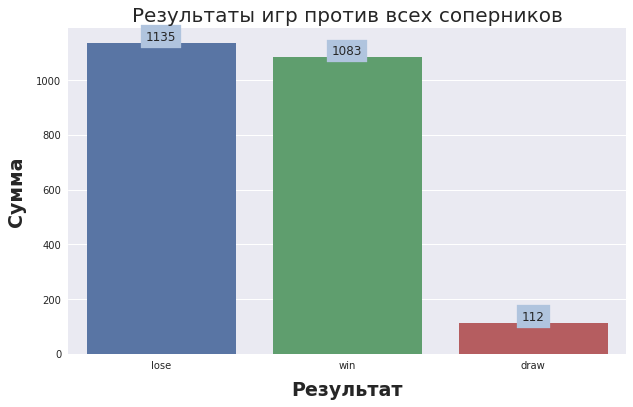

In [150]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(y='Result', x='index', data=df['Result'].value_counts().reset_index(), ax=ax)

ax.set_title('Результаты игр против всех соперников', fontsize = 20)
ax.set_xlabel('Рeзультат', fontsize = 19, labelpad = 10, fontweight ='bold')
ax.set_ylabel('Сумма', fontsize = 19, labelpad = 10, fontweight ='bold')


plt.bar_label(ax.containers[0], backgroundcolor = 'lightsteelblue', fontsize = 12)

plt.show()